In [ ]:
pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

In [ ]:
pip install pycocotools

In [ ]:
pip install numpy

In [ ]:
pip install scikit-image

In [ ]:
pip install matplotlib

In [6]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

In [7]:
coco = COCO('val/COCO_val_annos.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [8]:
mul_coco=COCO('val/COCO_mul_val_annos.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [9]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [10]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );


In [11]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

1 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [12]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

2 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [13]:
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '24.jpg', 'flickr_url': '', 'height': 1024, 'id': 2, 'license': 1, 'width': 1024}


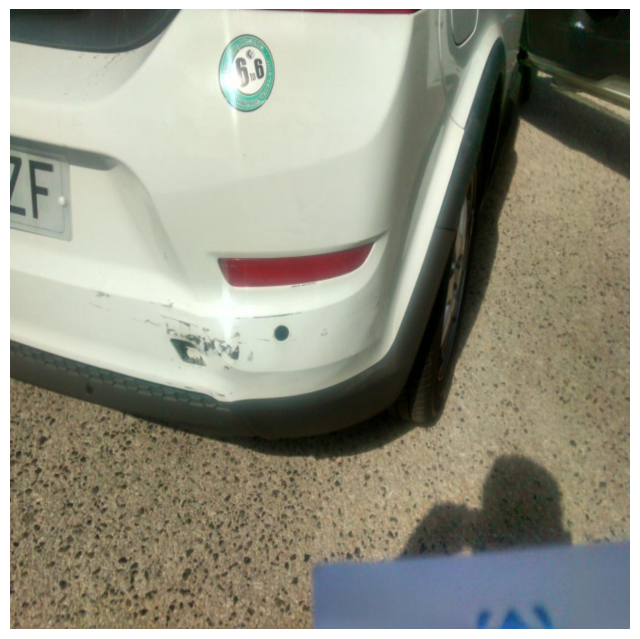

In [23]:
from skimage import io
import matplotlib.pyplot as plt

img = {'1': '3.jpg'}  

img_dir = 'img/'  

file_path = img_dir + img['1']
I = io.imread(file_path)

plt.axis('off')
plt.imshow(I)
plt.show()


In [15]:
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

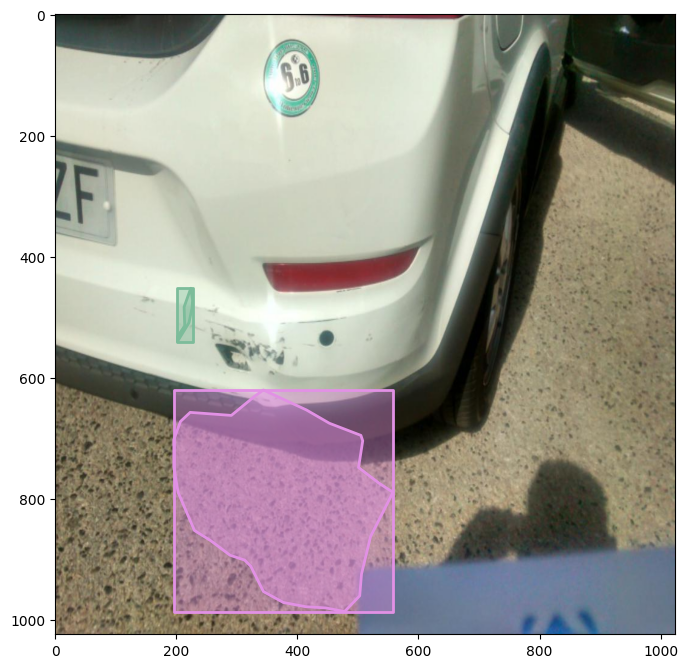

In [24]:
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [17]:
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [18]:
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [19]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

In [20]:
print(img)

{'1': '4.jpg'}


In [21]:
img_path = img_dir + 'img/' + img['1']  


Parts are: ['rear_bumper', 'headlamp', 'door']
Available keys in img: dict_keys(['1'])


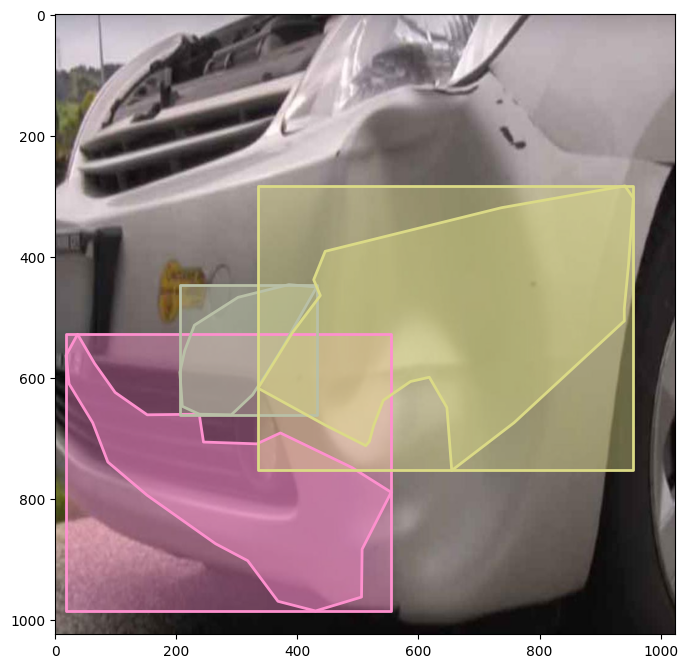

In [22]:
import matplotlib.pyplot as plt
import io
from skimage import io

# Supondo que mul_anns e category_map já estejam definidos
parts = [category_map[region['category_id']] for region in mul_anns]
print("Parts are:", parts)

# Verificar as chaves disponíveis em img
print("Available keys in img:", img.keys())

# Corrigir o caminho da imagem com a chave correta
img_path = img_dir + '/' + img['1']  # Substitua 'file_name' pela chave correta se necessário
I = io.imread(img_path)
plt.imshow(I)
plt.axis('on')

# Mostrar anotações com caixas delimitadoras
mul_coco.showAnns(mul_anns, draw_bbox=True)
plt.show()
